In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fire_csv = '../../datasets/Fire-Incidents.csv'

fire_df = pd.read_csv(fire_csv)
fire_df.head()

,Area_of_Origin,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Ext_agent_app_or_defer_time,Extent_Of_Fire,Fire_Alarm_System_Impact_on_Evacuation,Fire_Alarm_System_Operation,...,Longitude,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_at_Fire_Origin_Alarm_Failure,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


In [7]:
fire_df.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time'],
      dtype='object')

Change column names

In [8]:
fire_df.columns = ['origin', 'busi_impact', 'num_casualties', 'num_rescued', 'est_loss', 
                   'est_displaced', 'ext_agent_app_or_defer_time', 'extent', 'fire_alarm_impact_on_evac',
                   'fire_alarm_sys_op', 'fire_alarm_presence', 'fire_under_control_time', 'ignition_source',
                   'incident_station_area', 'incident_ward', 'last_tfs_unit_clear_time', 'latitude',
                   'longitude', 'material_first_ignited', 'method_of_fire_control', 'possible_cause',
                   'property_use', 'smoke_alarm_at_fire_origin_alarm_failure',
                   'smoke_alarm_at_fire_origin_alarm_type', 'status_of_fire_on_arrival',
                   'alarm_time', 'arrival_time']

In [9]:
fire_df.head()

,origin,busi_impact,num_casualties,num_rescued,est_loss,est_displaced,ext_agent_app_or_defer_time,extent,fire_alarm_impact_on_evac,fire_alarm_sys_op,...,longitude,material_first_ignited,method_of_fire_control,possible_cause,property_use,smoke_alarm_at_fire_origin_alarm_failure,smoke_alarm_at_fire_origin_alarm_type,status_of_fire_on_arrival,alarm_time,arrival_time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,-79.412479,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24T16:49:36,2018-08-24T16:54:09
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,-79.530419,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24T07:09:12,2018-11-24T07:14:23
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.373460,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09T17:45:07,2017-02-09T17:48:49
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,-79.393700,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30T00:42:01,2012-10-30T00:44:58
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,-79.511539,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08T04:08:50,2018-07-08T04:13:54


Explore the data

Add in response_time column
- First convert the alarm time and arrival time to datetime, then subtract

In [10]:
fire_df['alarm_time'] = pd.to_datetime(fire_df.alarm_time)
fire_df['arrival_time'] = pd.to_datetime(fire_df.arrival_time)

fire_df['response_time'] = (fire_df.arrival_time - fire_df.alarm_time).dt.total_seconds()
fire_df.head()

,origin,busi_impact,num_casualties,num_rescued,est_loss,est_displaced,ext_agent_app_or_defer_time,extent,fire_alarm_impact_on_evac,fire_alarm_sys_op,...,material_first_ignited,method_of_fire_control,possible_cause,property_use,smoke_alarm_at_fire_origin_alarm_failure,smoke_alarm_at_fire_origin_alarm_type,status_of_fire_on_arrival,alarm_time,arrival_time,response_time
0,Porch or Balcony,No business interruption,0,86,3000,0,2018-08-24T17:06:26,Confined to object of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system did not operate,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Fire with smoke showing only - including vehic...,2018-08-24 16:49:36,2018-08-24 16:54:09,273.0
1,Cooking Area or Kitchen,Undetermined,0,28,50000,28,2018-11-24T07:19:00,Confined to part of room/area of origin,Not applicable: Occupant(s) first alerted by o...,Fire alarm system operated,...,Plastic,Extinguished by occupant,Under Investigation,Infirmary,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire extinguished prior to arrival,2018-11-24 07:09:12,2018-11-24 07:14:23,311.0
2,"Living Area (e.g. living, TV, recreation, etc)",Not applicable (not a business),1,16,1000000,130,2017-02-09T18:02:13,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Hardwired (standalone),Flames showing from small area (one storey or ...,2017-02-09 17:45:07,2017-02-09 17:48:49,222.0
3,Undetermined (formerly 98),May not resume operations,0,12,1000000,14,2012-10-30T00:52:04,Entire Structure,Undetermined,Fire alarm system operation undetermined,...,Undetermined (formerly 98),Extinguished by fire department,Undetermined,"Clothing Store, Accessories, fur",Not applicable: Alarm operated OR presence/ope...,Type undetermined,Flames showing from large area (more than one ...,2012-10-30 00:42:01,2012-10-30 00:44:58,177.0
4,"Sleeping Area or Bedroom (inc. patients room, ...",Not applicable (not a business),8,11,125000,2,2018-07-08T04:35:00,"Spread beyond room of origin, same floor",Some persons (at risk) evacuated as a result o...,Fire alarm system operated,...,Bedding,Extinguished by fire department,Suspected Arson,Multi-Unit Dwelling - Over 12 Units,Not applicable: Alarm operated OR presence/ope...,Interconnected,Fire with no evidence from street,2018-07-08 04:08:50,2018-07-08 04:13:54,304.0


In [11]:
fire_df.describe()

,num_casualties,num_rescued,est_loss,est_displaced,incident_station_area,incident_ward,latitude,longitude,alarm_time,arrival_time,response_time
count,11214.000000,11214.000000,1.121400e+04,11214.000000,11214.000000,11181.000000,11214.000000,11214.000000,11214,11214,11214.000000
mean,0.112538,0.062154,4.294369e+04,17.274835,288.281880,19.582685,43.705190,-79.403323,2015-03-24 00:14:27.684501248,2015-03-24 00:19:27.843142656,300.158641
min,0.000000,0.000000,0.000000e+00,0.000000,111.000000,1.000000,43.588926,-79.635241,2011-01-01 05:49:17,2011-01-01 05:56:57,24.000000
25%,0.000000,0.000000,2.500000e+02,0.000000,221.000000,10.000000,43.662474,-79.479273,2013-02-11 19:32:11.500000,2013-02-11 19:37:10.500000,245.000000
50%,0.000000,0.000000,2.500000e+03,0.000000,314.000000,19.000000,43.697050,-79.403892,2015-03-03 11:13:33,2015-03-03 11:18:41.500000,291.000000
75%,0.000000,0.000000,1.500000e+04,1.000000,346.000000,28.000000,43.747770,-79.337150,2017-05-14 06:08:14.750000128,2017-05-14 06:12:44,346.000000
max,15.000000,86.000000,5.000000e+07,999.000000,445.000000,44.000000,43.846200,-79.124410,2019-06-30 22:44:55,2019-06-30 22:51:52,17871.000000
std,0.456429,0.962587,5.339367e+05,119.071696,107.515995,11.762782,0.051183,0.101086,NaN,NaN,185.453069


Lets check a machine learning model predictions with the data as it is

In [12]:
fire_num_df = fire_df[['num_casualties', 'num_rescued', 'est_loss', 'est_displaced', 
                       'incident_station_area', 'latitude', 'longitude', 'response_time']]

In [13]:
corr_matrix = fire_num_df.corr()
corr_matrix.est_loss.sort_values(ascending=False)

est_loss                 1.000000
est_displaced            0.115060
incident_station_area    0.014203
num_casualties           0.013654
num_rescued              0.013145
response_time            0.004089
latitude                -0.000073
longitude               -0.009601
Name: est_loss, dtype: float64

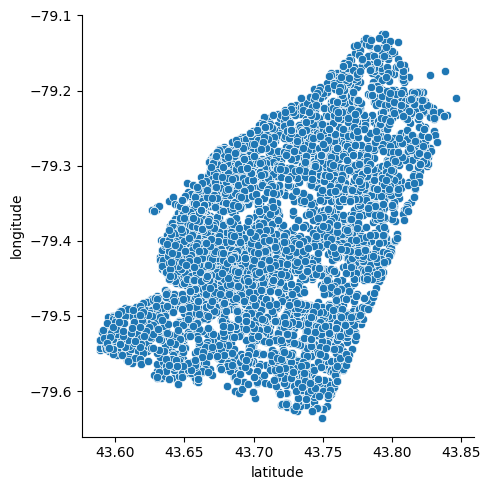

In [14]:
sns.relplot(
    data=fire_num_df,
    x='latitude',
    y='longitude'
);

In [15]:
X = fire_num_df.drop(columns='est_loss')
y = fire_num_df['est_loss']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lreg = LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error
loss_pred = lreg.predict(X_test)

linear_mse = mean_squared_error(y_test, loss_pred)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

202368.66768177995

Off by 200,000! Very poor. 

Let's try getting our hands dirty with feature engineering, one-hot encoding, scaling, etc.

We will pickle the fire_df dataframe so we can use it in a different file

In [21]:
fire_df.to_pickle('../pickled_data/fire_df_pred_one.pkl')